In [2]:
import itk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import pydicom as dicom
import cv2

In [4]:
path = "/Users/schama/Downloads/rsna-breast-cancer-detection/"

In [5]:
data = pd.read_csv(path+"train.csv")

In [6]:
data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [7]:
# ID code for the source hospital.
data.site_id.unique()

array([2, 1])

In [8]:
# An ID code for the imaging device.
data.machine_id.unique()

array([ 29,  21, 216,  93,  49,  48, 170, 210, 190, 197])

In [9]:
data.shape

(54706, 14)

In [10]:
# Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
data.cancer.unique()

array([0, 1])

In [11]:
data.loc[data['cancer'] == 1]

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False
191,1,10226,530620473,L,CC,71.0,1,1,1,0.0,0,C,49,False
215,1,1025,773597682,L,CC,56.0,1,1,0,0.0,0,B,49,False
216,1,1025,1803952236,L,MLO,56.0,1,1,0,0.0,0,B,49,False
407,2,10432,458553546,L,CC,65.0,1,1,1,NaN,0,NaN,48,False
408,2,10432,1434858530,L,MLO,65.0,1,1,1,NaN,0,NaN,48,False


In [12]:
# specify your image path
ds = dicom.dcmread(path+"train_images/1028/315268478.dcm")

In [13]:
pixel_array_numpy = ds.pixel_array


In [14]:
pixel_array_numpy.shape

(5355, 4915)

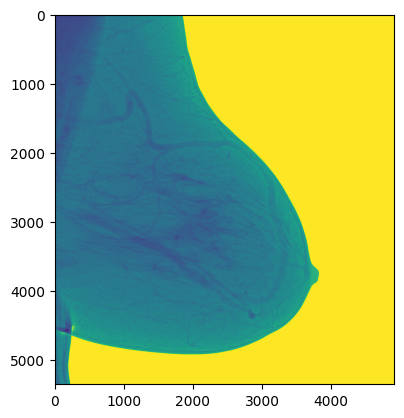

In [15]:
imgplot = plt.imshow(pixel_array_numpy)

In [16]:
meta = dicom.read_file(path+"train_images/1028/315268478.dcm")

In [17]:
meta

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.1028.1.315268478
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.1028.1.315268478
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184049.243873'
(0010, 0020) Patient ID                          LO: '1028'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.1028
(0020, 000e) Series Instance UID  

In [ ]:
image_format = '.jpg' # or '.png'
image_path = image_path.replace('.dcm', image_format)
cv2.imwrite(image_path, pixel_array_numpy)